In [ ]:
DATE: 24-8-2021
COURSE 7 FINAL ACTIVITY
Prediction of marks of a student based on the number of
hours he/she studies
https://raw.githubusercontent.com/Kushal997-das/THE-SPARKS-FOUNDATION/master/Pr
ediction%20using%20Supervised%20ML/student_scores%20-%20student_scores.csv
Task
Read the data from the provided link
Understand the data by reading first 5 and last 5 records from the dataset
Check the shape of data
Check if there is any null values
Display the summary of the dataset
Group the data using score and hours, then Using bar chart ,plot score vs hours. The
next phase is to enter distribution scores and plot them according to the requirement,
here we are going to enter the title, x_label, and y_label, and show it according to the
desired result.
Visualize distribution of data using scatter plot
Prepare the data by splitting it into Training and Test set
Plot the regression line
Plot the training and test data . Predict the score and compare predicted and actual
score
Predict accuracy using r2square
Predict the percentage grade of a student if study hours are 9.25
Evaluate the model: Calculate Mean absolute error, mean squared error, root mean
squared error
Import seaborn and plot the distribution as well
Print actual vs predicted percentage score
Task
Apply ridge and grid search to improvise your model
Page 2

First 5 rows:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

Last 5 rows:
    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86

Shape of dataset: (25, 2)

Null values in dataset:
Hours     0
Scores    0
dtype: int64

Summary statistics:
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


<Figure size 800x600 with 0 Axes>

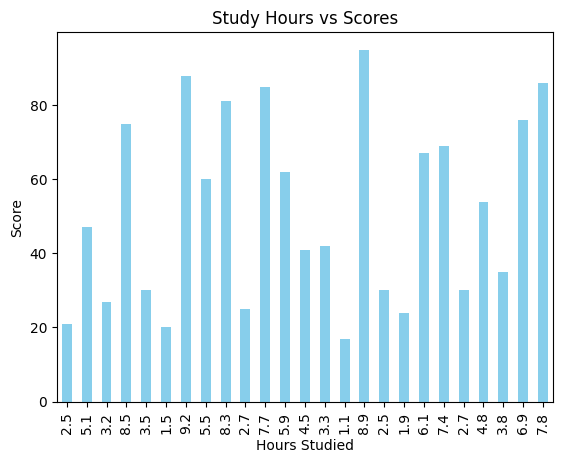

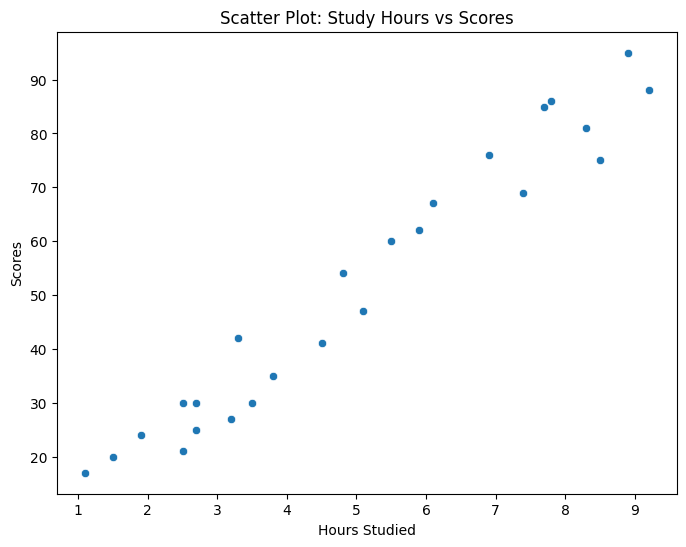

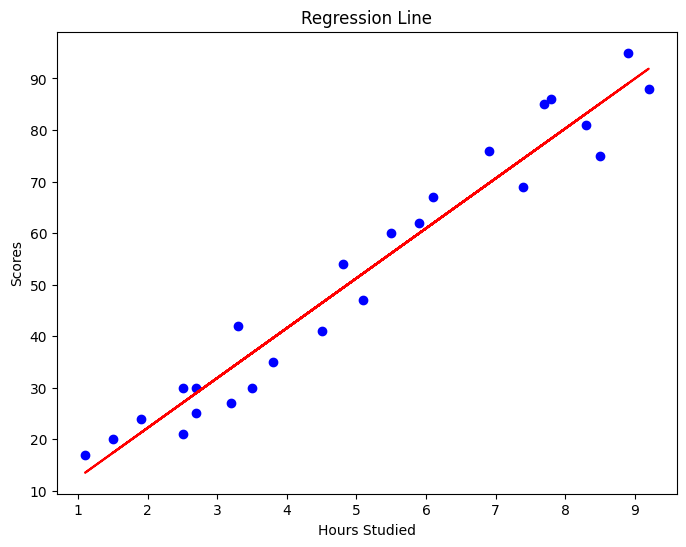


Actual vs Predicted:
     Actual  Predicted
8       81  83.188141
16      30  27.032088
0       21  27.032088
23      76  69.633232
11      62  59.951153

Predicted score for 9.25 hours: 92.39

Model Performance:
Mean Absolute Error: 3.92
Mean Squared Error: 18.94
Root Mean Squared Error: 4.35
R-squared Score: 0.97


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Best Ridge Regression R2 Score: 0.97


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load dataset
url = "https://raw.githubusercontent.com/Kushal997-das/THE-SPARKS-FOUNDATION/master/Prediction%20using%20Supervised%20ML/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

# Display first and last 5 rows
print("First 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

# Check shape of the data
print(f"\nShape of dataset: {df.shape}")

# Check for null values
print(f"\nNull values in dataset:\n{df.isnull().sum()}")

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Visualizing Score vs Hours using Bar Chart
plt.figure(figsize=(8,6))
df.plot(kind='bar', x='Hours', y='Scores', color='skyblue', legend=False)
plt.title("Study Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

# Scatter plot to visualize data distribution
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Hours'], y=df['Scores'])
plt.title("Scatter Plot: Study Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.show()

# Splitting dataset into training and testing sets
X = df[['Hours']]
y = df['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Plot Regression Line
line = model.coef_ * X + model.intercept_
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue')
plt.plot(X, line, color='red')
plt.title("Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.show()

# Predicting Test set results
y_pred = model.predict(X_test)

# Compare actual vs predicted
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted:\n", df_pred)

# Predict score for 9.25 hours
predicted_score = model.predict([[9.25]])[0]
print(f"\nPredicted score for 9.25 hours: {predicted_score:.2f}")

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Ridge Regression with GridSearchCV
ridge = Ridge()
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_ridge = grid_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"\nBest Ridge Regression R2 Score: {r2_ridge:.2f}")
